### Import necessary libraries

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Load the data

In [40]:
data = pd.read_csv(r"C:\Users\asus\Documents\auto-mpg.csv")
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Preprocessing: check fo missing values

In [41]:
data.isna().sum()
data.drop(columns=['car name'], inplace=True)
df=data

In [42]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing values with the mean of the column
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [43]:
X = df.drop(columns=['mpg'])
y = df['mpg']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Initialize and train the Linear Regression model



In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': df.columns[1:],
    'Coefficient': model.coef_
})
print(coefficients)

Mean Squared Error (MSE): 8.195452104073777
R-squared (R2): 0.8475731044779435
        Feature  Coefficient
0     cylinders    -0.261931
1  displacement     1.457675
2    horsepower    -0.450124
3        weight    -5.730332
4  acceleration     0.206260
5    model year     2.941381
6        origin     1.052025


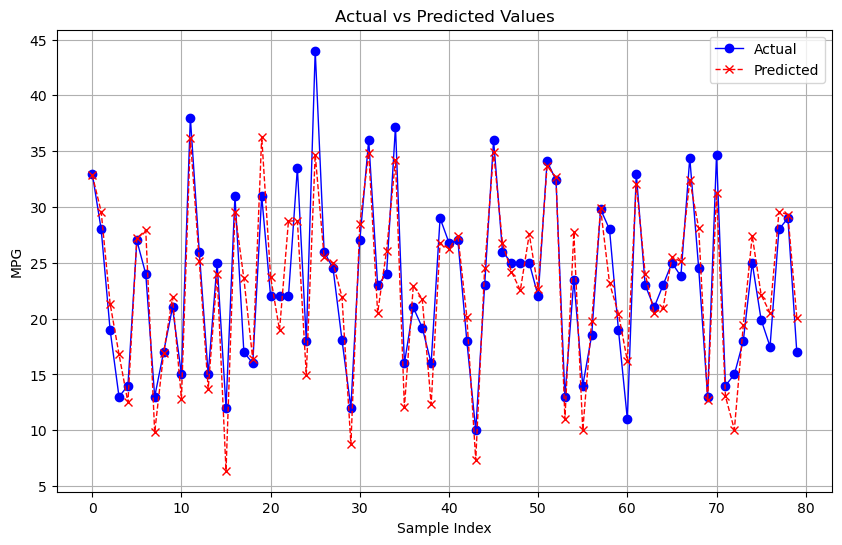

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o', color='b', linestyle='-', linewidth=1)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='r', linestyle='--', linewidth=1)
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("MPG")
plt.legend()
plt.grid(True)
plt.show()
